# LAB 02 - CO544 - Data Visualization

## 1. Importing Data set

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
gapminder_df = pd.read_csv('gapminder.tsv', sep='\t') #Read the dataset
gapminder_df.head() #Display first few rows of the dataset

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [4]:
recent_year = gapminder_df['year'].max() #Get the most recent year
recent_year_df = gapminder_df[gapminder_df['year'] == recent_year] #Filter the dataframe based on the most recent year
recent_year_df.shape #Shape of the new dataframe
recent_year_df['gdpPercap'].describe()

count      142.000000
mean     11680.071820
std      12859.937337
min        277.551859
25%       1624.842248
50%       6124.371108
75%      18008.835640
max      49357.190170
Name: gdpPercap, dtype: float64

## 2. Histograms

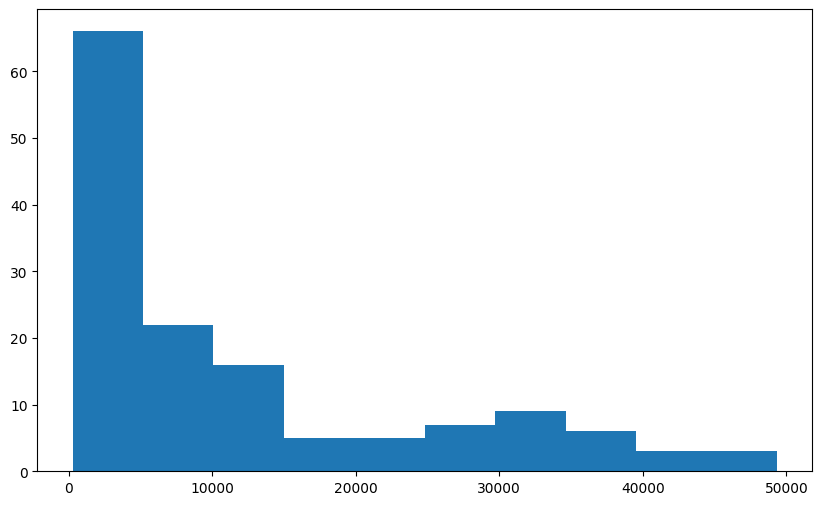

In [5]:
plt.figure(figsize=(10, 6)) #Create a figure
plt.hist(recent_year_df['gdpPercap']); #Plot the histogram

Text(0, 0.5, 'Number of countries')

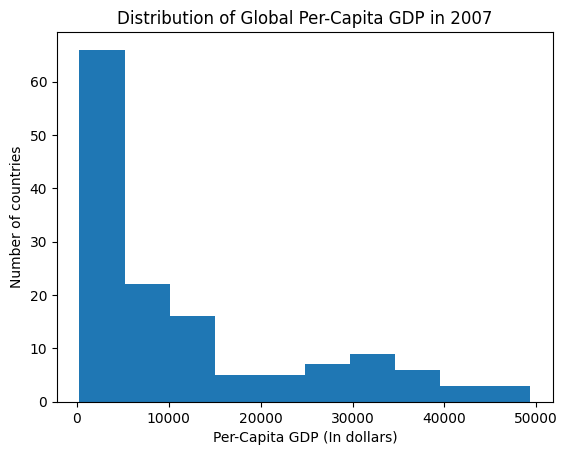

In [6]:
# Using Bin size of 10(default)

plt.hist(recent_year_df['gdpPercap']) #Plot the histogram
plt.title('Distribution of Global Per-Capita GDP in 2007') #Add a title to the plot
plt.xlabel('Per-Capita GDP (In dollars)') #Add labels to the axes
plt.ylabel('Number of countries') #Add labels to the axes

Text(0, 0.5, 'Number of countries')

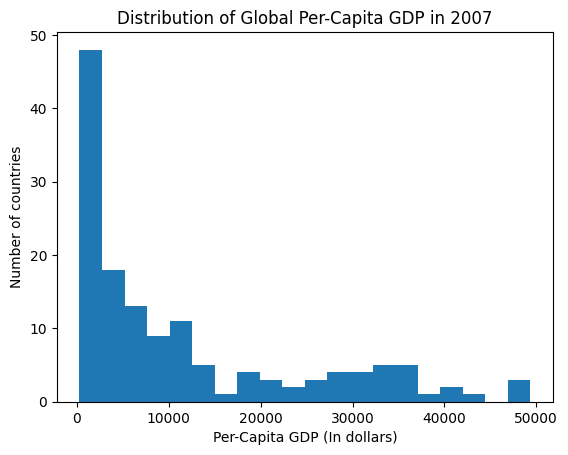

In [7]:
# Using Bin size of 20

plt.hist(recent_year_df['gdpPercap'], bins=20) #Plot the histogram
plt.title('Distribution of Global Per-Capita GDP in 2007')
plt.xlabel('Per-Capita GDP (In dollars)')
plt.ylabel('Number of countries')

6280


Text(0, 0.5, 'Number of countries')

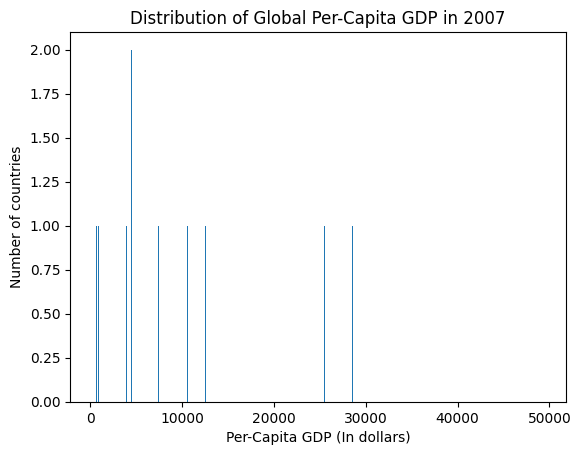

In [8]:
# Using optimal bin size

# calculate the optimal bin width using Freedman-Diaconis rule and round up to the nearest integer
optBinSize = int(2 * (recent_year_df['gdpPercap'].quantile(0.75) - recent_year_df['gdpPercap'].quantile(0.25)) * (recent_year_df.shape[0] ** (-1/3)))
print(optBinSize)
plt.hist(recent_year_df['gdpPercap'], bins=optBinSize)
plt.title('Distribution of Global Per-Capita GDP in 2007')
plt.xlabel('Per-Capita GDP (In dollars)')
plt.ylabel('Number of countries')

## 3. Bar Plots

In [9]:
# Moreover, it would be useful to get a perception on how many countries per continent in the dataset. 
# To do that, let’s create a new dataframe that includes only unique combinations of country and continent.
countries_df = gapminder_df[['country', 'continent']] #New dataframe with selected features
countries_df = countries_df.drop_duplicates() #Drop duplicate combinations
countries_df.shape

(142, 2)

In [10]:
# To get the number of countries per continent, the groupby() method can be used. 
# The count of unique counties in each continent is then tallied. 
# Here, we use the as_index=False so that the continent name gets its own column, and is not used as the index.
country_counts_df = countries_df.groupby('continent', as_index=False).agg('count') #Group by continent and count unique countries
country_counts_df.head()

,continent,country
0,Africa,52
1,Americas,25
2,Asia,33
3,Europe,30
4,Oceania,2


([<matplotlib.axis.XTick at 0x14d0a1ad0>,
 [Text(0, 0, 'Africa'),
  Text(1, 0, 'Americas'),
  Text(2, 0, 'Asia'),
  Text(3, 0, 'Europe'),
  Text(4, 0, 'Oceania')])

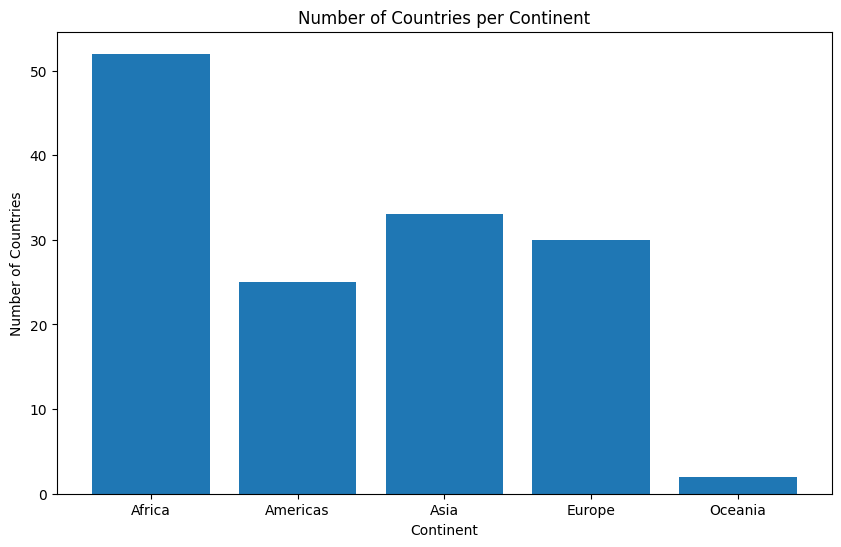

In [11]:
# Let us use a bar plot, which plots numerical values for levels of a categorical feature as bars, to plot the data.
no_continents = len(country_counts_df)
x = range(no_continents)
# print(x)

y = country_counts_df['country']
continents = country_counts_df['continent']
# print(continents)
plt.figure(figsize=(10, 6))
plt.bar(x, y) #Plot bar graph
plt.xlabel('Continent')
plt.ylabel('Number of Countries')
plt.title('Number of Countries per Continent')
plt.xticks(x, continents)

## 4. Line plots

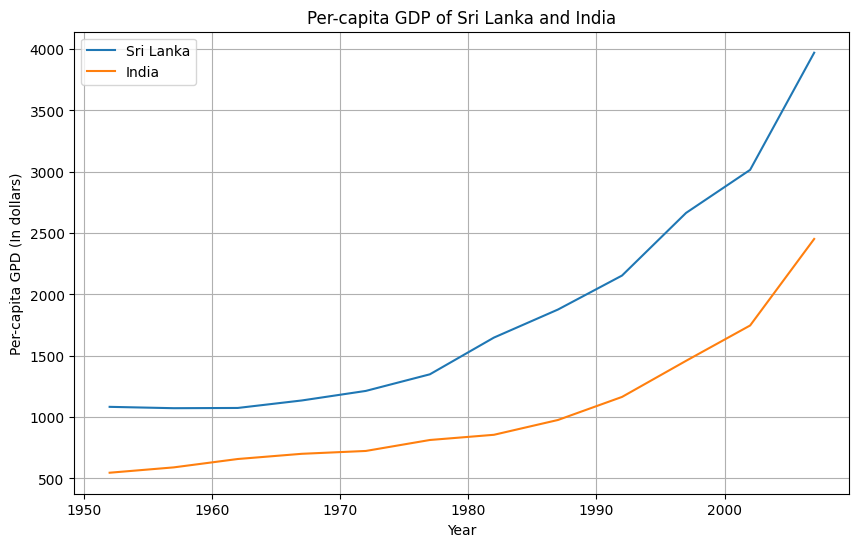

In [14]:
lk = gapminder_df[gapminder_df['country'] == 'Sri Lanka']
india = gapminder_df[gapminder_df['country'] == 'India']
plt.figure(figsize=(10, 6))
plt.plot(lk['year'], lk['gdpPercap'])
plt.plot(india['year'], india['gdpPercap'])
plt.legend(['Sri Lanka', 'India'])
plt.title('Per-capita GDP of Sri Lanka and India')
plt.xlabel('Year')
plt.ylabel('Per-capita GPD (In dollars)')
plt.grid()